In [70]:
import numpy as np
import sys
from scipy import special
from scipy import stats
import matplotlib.pyplot as plt

import time

In [2]:
from KarhunenLoeve import *

In [66]:
mean = np.array([0, 0, 0])
cov = np.eye(3)
Zn = np.random.multivariate_normal(mean, cov, size = 5)
tl = np.array([0.1, 0.2])

In [69]:
np.sum(Zn, axis = 0)[None, :].shape

(1, 3)

In [50]:
kl = KarhunenLoeve(1, seeded = False, N = 5)

In [65]:
kl.W(t)[:,:,  np.newaxis].shape

(100, 3, 1)

In [5]:
t = np.array([0.1, 0.2])
n = np.array([2, 3, 4, 5])
out = t[None, :] * n[:, None]
print(out)
print(out.shape)

[[0.2 0.4]
 [0.3 0.6]
 [0.4 0.8]
 [0.5 1. ]]
(4, 2)


In [55]:
t = np.linspace(0, 1, 100)
Zn = kl.Zn
phi = kl.phi(t)
out = Zn[:, None, :] * phi[:, :, None]
out.shape

(3960, 100, 3)

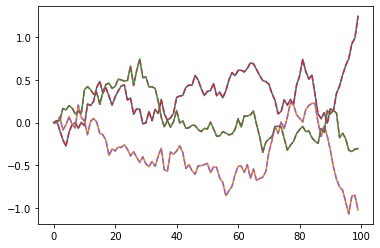

In [56]:
plt.plot(kl.W(t))
plt.plot(np.sum(out, axis = 0), '--')

In [22]:
T = 1
n = 3000
numt = 99
t = np.linspace(0, T, numt)

(99, 3)
19.6025
0.9856791297703242


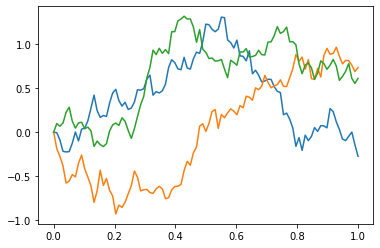

In [39]:
out = kl.W(t, False)
print(out.shape)
dt = T/(numt+1)

print(dt/kl.period())

print(np.mean(np.diff(t)/np.var(np.diff(out, axis=0))))
plt.plot(t, out)

In [662]:
t

array([0.        , 0.01020408, 0.02040816, 0.03061224, 0.04081633,
       0.05102041, 0.06122449, 0.07142857, 0.08163265, 0.09183673,
       0.10204082, 0.1122449 , 0.12244898, 0.13265306, 0.14285714,
       0.15306122, 0.16326531, 0.17346939, 0.18367347, 0.19387755,
       0.20408163, 0.21428571, 0.2244898 , 0.23469388, 0.24489796,
       0.25510204, 0.26530612, 0.2755102 , 0.28571429, 0.29591837,
       0.30612245, 0.31632653, 0.32653061, 0.33673469, 0.34693878,
       0.35714286, 0.36734694, 0.37755102, 0.3877551 , 0.39795918,
       0.40816327, 0.41836735, 0.42857143, 0.43877551, 0.44897959,
       0.45918367, 0.46938776, 0.47959184, 0.48979592, 0.5       ,
       0.51020408, 0.52040816, 0.53061224, 0.54081633, 0.55102041,
       0.56122449, 0.57142857, 0.58163265, 0.59183673, 0.60204082,
       0.6122449 , 0.62244898, 0.63265306, 0.64285714, 0.65306122,
       0.66326531, 0.67346939, 0.68367347, 0.69387755, 0.70408163,
       0.71428571, 0.7244898 , 0.73469388, 0.74489796, 0.75510

In [405]:
def phi(n, t, T):
    factor = 2*np.sqrt(2 * T)/((2*n + 1)*np.pi)
    arg = (2*n + 1)*np.pi*t/(2*T)
    return factor * np.sin(arg)

def W(t, T, N):
#     np.random.seed(0)
    nlist = np.linspace(0, N-1, N)
    Zn = np.random.normal(size = (N))
    series = np.zeros((t.shape[0], N))
    for i in range(len(nlist)):
        n = nlist[i]
        series[:, i] = Zn[i] * phi(n, t, T)
    return np.sum(series, axis = 1)

In [7]:
t = np.linspace(0, 1, 100)
plt.plot(t, phi(50, t, 1))

NameError: name 'phi' is not defined

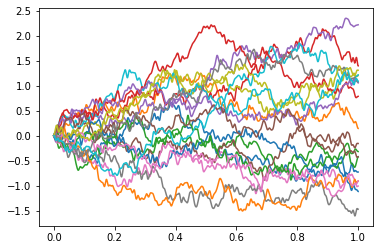

In [407]:
t = np.linspace(0, 1, 10000)
tc = np.linspace(0, 1, 100)

for i in range(20):
    plt.plot(t, W(t, 1, 200))

# plt.plot(tc, W(tc, 1, 250))

In [536]:
def period(n, T):
    return 2 * np.pi * 2 * T /((2*n + 1)*np.pi)

In [652]:
T = 1
n = 3000
numt = 99
t = np.linspace(0, T, numt)
dt = T/(numt+1)
out = W(t, T, n)
print(dt/period(n, T))

15.0025


In [653]:
np.var(np.diff(out))
np.mean(np.diff(t)/np.var(np.diff(out)))

0.976028863188078

In [630]:
1/1000

0.001

In [631]:
np.diff(t)

array([0.01020408, 0.01020408, 0.01020408, 0.01020408, 0.01020408,
       0.01020408, 0.01020408, 0.01020408, 0.01020408, 0.01020408,
       0.01020408, 0.01020408, 0.01020408, 0.01020408, 0.01020408,
       0.01020408, 0.01020408, 0.01020408, 0.01020408, 0.01020408,
       0.01020408, 0.01020408, 0.01020408, 0.01020408, 0.01020408,
       0.01020408, 0.01020408, 0.01020408, 0.01020408, 0.01020408,
       0.01020408, 0.01020408, 0.01020408, 0.01020408, 0.01020408,
       0.01020408, 0.01020408, 0.01020408, 0.01020408, 0.01020408,
       0.01020408, 0.01020408, 0.01020408, 0.01020408, 0.01020408,
       0.01020408, 0.01020408, 0.01020408, 0.01020408, 0.01020408,
       0.01020408, 0.01020408, 0.01020408, 0.01020408, 0.01020408,
       0.01020408, 0.01020408, 0.01020408, 0.01020408, 0.01020408,
       0.01020408, 0.01020408, 0.01020408, 0.01020408, 0.01020408,
       0.01020408, 0.01020408, 0.01020408, 0.01020408, 0.01020408,
       0.01020408, 0.01020408, 0.01020408, 0.01020408, 0.01020